# TP4 - plus courts chemins dans un graphe orienté

L'objectif de ce TP est de mettre en œuvre l'algorithme de Dijkstra de calcul du plus court chemin à origine unique dans un graphe **orienté** pondéré (sans poids négatif).

Dans le chapitre 3 l'algorithme est décrit pour les graphes non orientés. Cependant, l'algorithme de Dijkstra fonctionne également pour les graphes orientés. Sans rien y changer.

## Rappel de l'algorithme

Pour rappel, l'algorithme de Dijkstra peut s'implémenter avec une structure de données disposant de 3 opérations :
- insérer un élément 
- extraire l'élément minimum
- diminuer un élément

Un élément doit ici être entendu comme un couple constitué d'un sommet d'un graphe et de la distance associée (par rapport à un sommet de départ).

On peut alors avoir une expression de l'algorithme qui est :
```text
Entrée : un graphe G, un sommet de départ
Sortie : les distances les plus courtes entre le sommet de départ et chacun des sommets de G

    initialiser la structure de données SD
    créer un tableau T qui conservera les distances
    tant qu'il reste des sommets à traiter dans SD faire
        nmin, dmin = extraire l'élément minimum de SD
        enregistrer dans T la distance dmin pour le sommet nmin       
        pour chaque voisin du sommet nmin faire
            mettre à jour si besoin la distance associée au voisin dans la SD           
    renvoyer T
```

On propose dans ce TP de tester une structures de données basée sur des tableaux ou des listes pour implémenter l'algorithme. En complément, une seconde partie du TP est à votre disposition pour tester d'autres structures de données.

## Préliminaires

### Graphes orientés en NetworkX

La page de la [documentation de NetworkX](https://networkx.github.io/documentation/stable/reference/classes/digraph.html) sur les graphes orientés, ci-dessous un exemple.

In [1]:
import networkx as nx
import matplotlib as plt

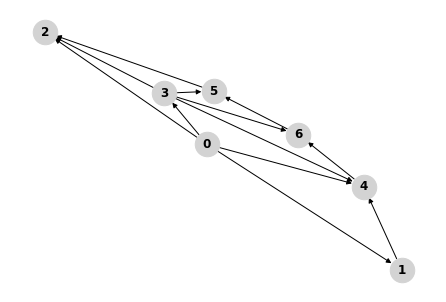

In [2]:
g = nx.DiGraph()
l = [(0,1,5),(0,2,7),(0,3,4),(0,4,2),(1,4,2),(3,4,3),(3,6,4),(3,5,7),(3,2,9),(4,6,7),(6,5,12),(5,2,5)]
for a,b,w in l:
    g.add_edge(a,b,weight=w)
nx.draw(g,with_labels=True,node_color='lightgrey',node_size=600,font_weight='bold')

La fonction NetworkX permettant de calculer les plus courts chemins avec l'algorithme de Dijkstra est [shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length). La tester sur ce graphe.

In [56]:
nx.shortest_path_length(g,0,weight = "weight")

{0: 0, 4: 2, 3: 4, 1: 5, 2: 7, 6: 8, 5: 11}

### La structure de données pour implanter l'algorithme

On propose ci-dessous la définition d'une interface pour implanter la structure de données permettant de mettre en œuvre l'algorithme de Dijkstra tel que décrit ci-dessus.

In [46]:
class DSD (object):
    """
    DSD = Data Structure for Dijkstra algorithm
    
    Cette structure de données implémente les trois opérations nécessaires à la mise en
    œuvre de l'algorithme de Dijkstra.
    
    
    """
    
    def __init__ (self, graph, start):
        """
        Initialise la structure de données avec une distance de 0 associée au sommet 
        `start` du `graph` et l'infini pour les autres.
        """
        assert(start in graph.nodes())
        self.__graph = graph
        self.__start = start
        pass
        
    def insert (self, node, distance):
        """
        Ajoute le sommet `node` à la structure de données en y associant la distance
        `distance`.
        """
        pass
        
    def extract_min (self):
        """
        Retourne un couple (sommet,distance) correspondant à la distance minimale stockée
        dans la structure de données. Par effet de bord, cet élément est retiré de la 
        structure de données.
        
        Si la structure de données est vide produit une erreur.
        """
        pass
        
    def decrease (self, node, distance):
        """
        Met à jour la distance associée au sommet `node`.
        Cette mise à jour n'est réalisée que si `distance`est inférieure à la valeur 
        associée à `node`dans la structure de donnée.
        Sinon ne fait rien.
        """
        pass
    

    def is_empty (self):
        pass

## Implémentation de l'algorithme

Proposer une implantation en Python de l'algorithme de Dijkstra utilisant cette interface (bien sûr, il ne sera pas possible de tester tant qu'on n'a pas au moins une réalisation de cette interface).

In [53]:
def plus_court_chemin (graph, start, dsdo):
    """
    Calcule le plus court chemin dans `graph` entre le sommet de départ `start` et 
    tous les autres sommets accessibles.
    
    Parametres
    ----------
    graph: networkX.DiGraph ou networkx.Graph
        le graphe
    start: int
        le sommet de départ
    dsdo: Class
        le nom d'une classe qui hérite de DSD
        
    Retourne
    --------
    dict
        un dictionnaire des distances entre `start` et les autres sommets
    """
    dsd = dsdo(graph,start)
    passNeighbors = list()
    dico = dict()
    while not dsd.is_empty() :
        min = dsd.extract_min()
        passNeighbors.append(min[0])
        dico[min[0]] = min[1] 
        print(min)
        for n in graph.successors(min[0]) :
            if n not in passNeighbors :
                print("           " + str(n))
                dsd.decrease(n,min[1] + graph[min[0]][n]["weight"])
        print(dsd)
    return dico

    
    
    
    

    

### Implémentation avec un tableau

On propose de débuter par une implémentation de la structure de données qui utilise un tableau (ou une liste en Python), comme décrit dans le polycopié.

Implanter une classe `DSDArray`. La notation `DSD` entre parenthèses qui suit le nom de la classe `DSDArray`indique que la classe `DSDArray` hérite de la classe DSD.  

In [54]:
import math

class DSDArray (DSD):
    
    def __init__(self,graph,start):
        super().__init__(graph,start) 
        self.poidTotal = dict()
        self.poidTotal[start] = 0
        otherNodes = list(graph.nodes)
        otherNodes.remove(start)
        for node in otherNodes :
            self.poidTotal[node] = math.inf

        
        
    def insert(self, node, distance):
        self.poidTotal[node] = distance
        
    def extract_min(self):
        minimum = min(self.poidTotal, key = self.poidTotal.get)
        return (minimum,self.poidTotal.pop(minimum))
        
    def decrease(self, node, distance):
        if self.poidTotal[node] > distance :
            self.insert(node,distance)
            
    def is_empty(self):
        return not bool(self.poidTotal)
    
    def __str__(self):
        s = ""
        for node in self.poidTotal :
            s += str(node) +":"+ str(self.poidTotal[node]) +" "
        return s

Puis tester la fonction de calcul du plus court chemin pour le graphe `g` à partir du sommet 0, en utilisant la classe `DSDArray` (ici on passe bien le nom de la classe, l'instanciation est réalisée dans `plus_court_chemin`, voir la documentation de la fonction).

In [55]:
plus_court_chemin (g, 0, DSDArray)

(0, 0)
           1
           2
           3
           4
1:5 2:7 3:4 4:2 6:inf 5:inf 
(4, 2)
           6
1:5 2:7 3:4 6:9 5:inf 
(3, 4)
           6
           5
           2
1:5 2:7 6:8 5:11 
(1, 5)
2:7 6:8 5:11 
(2, 7)
6:8 5:11 
(6, 8)
           5
5:11 
(5, 11)



{0: 0, 4: 2, 3: 4, 1: 5, 2: 7, 6: 8, 5: 11}

### Observation du temps de calcul

#### Génération de graphes connexes aléatoires

La génération de graphes orientés aléatoires fortement connexes (pour s'assurer qu'on trouvrea un chemin entre tout paire de sommets) n'est pas très facile. On propose donc ici de revnir à des graphes non orientés et de s'appuyer sur la proposition ci-dessous pour avoir un générateur de graphes aléatoires dont la densité en nombre d'arêtes peut être ajustée.

https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx

In [57]:
from itertools import combinations, groupby
import networkx as nx
import random

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is connected
    """
    assert p > 0 and p <= 1
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1,100)
    return G

Et voici des exemples d'utilisation.

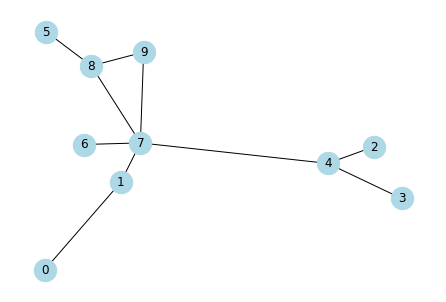

In [58]:
G = gnp_random_connected_graph(10,0.01)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

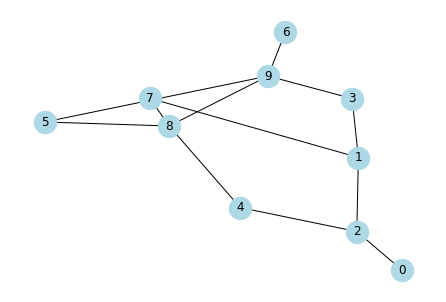

In [59]:
G = gnp_random_connected_graph(10,0.1)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

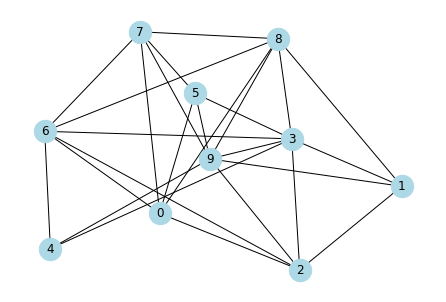

In [60]:
G = gnp_random_connected_graph(10,0.5)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

#### Mesure du temps de calcul

On propose d'utiliser [timeit](https://docs.python.org/fr/3.8/library/timeit.html#timeit-examples) pour mesurer le temps d'exécution. Cela peut-être réalisé dans le Notebook comme montré en exemple ci-dessous mais aussi via la ligne de commande.

In [61]:
import timeit

In [62]:
def test_Dijkstra_networkX(order):
    G = gnp_random_connected_graph(order,0.005) 
    nx.shortest_path_length(G, source=0, target=G.order()-1,weight='weight')

In [63]:
%timeit -n 10 test_Dijkstra_networkX(200)

4.77 ms ± 921 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Créer une fonction test similaire à celle ci-dessus pour votre implémentation basée sur la structure de données avec tableaux.

In [64]:
def test(order): 
    pass

In [65]:
%timeit -n 10 test(200)

76.1 ns ± 32.3 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Observation de l'évolution du temps de calcul pour une densité d'arêtes grandissante pour un ordre fixé.

Modififier les fonctions `test_Dijkstra_networkX` et `test` pour qu'elles prennent en second paramètre la probabilité d'arête. 

Puis effectuer des tests et observer la différence de temps de calcul entre des graphes peu denses en nombre d'arêtes et d'autres plus denses.

## Implémentation NetworkX

Quelle structure de données est utilisée par NetworkX ? (on pourra regarder le code de la fonction [shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length).